In [1]:
import matplotlib.pyplot as plt
from mu2e.src.fiteval_c import FitFunctionMaker
from mu2e.tools.fiteval import get_mag_field_function
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
ffm= FitFunctionMaker("../mu2e/src/param_825.csv")
mag_field_function = get_mag_field_function('Mau10_825mm_v1')

In [3]:
out = ffm.mag_field_function(0,600,7000,True)
print out[0], out[1], out[2]
out = mag_field_function(0,600,7000,True)
print out[0], out[1], out[2]
print
out = ffm.mag_field_function(200,100,6500,True)
print out[0], out[1], out[2]
out = mag_field_function(200,100,6500,True)
print out[0], out[1], out[2]

-0.000388219587201 0.0469824538665 1.17534666731
-0.000388219587201 0.0469824538665 1.17534666731

0.0234747107698 0.0118595292975 1.32644896854
0.0234747107698 0.0118595292975 1.32644896854


Using the field fitting function, generate a set of Bz values for a 1D section in the Z direction.

In [5]:
def bz_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[2]
vbz_func = np.vectorize(bz_func,excluded=['x','y'])

def by_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[1]
vby_func = np.vectorize(by_func,excluded=['x','z'])

def bx_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[0]
vbx_func = np.vectorize(bx_func,excluded=['y','z'])

In [6]:
zs_1 = np.linspace(7900,8000,101)
zs_2 = np.linspace(6800,7200,401)
zs_3 = np.linspace(9800,10300,501)

xs = ys  = np.linspace(100,300,301)

In [7]:
bzs_1 = vbz_func(x = 0, y = 0, z = zs_1)
bzs_2 = vbz_func(x = 0, y = 600, z = zs_2)
bzs_3 = vbz_func(x = 0, y = 0, z = zs_3)

bxs = vbx_func(x=xs, y=100, z=6500)
bys = vby_func(x=100, y=ys, z=6500)

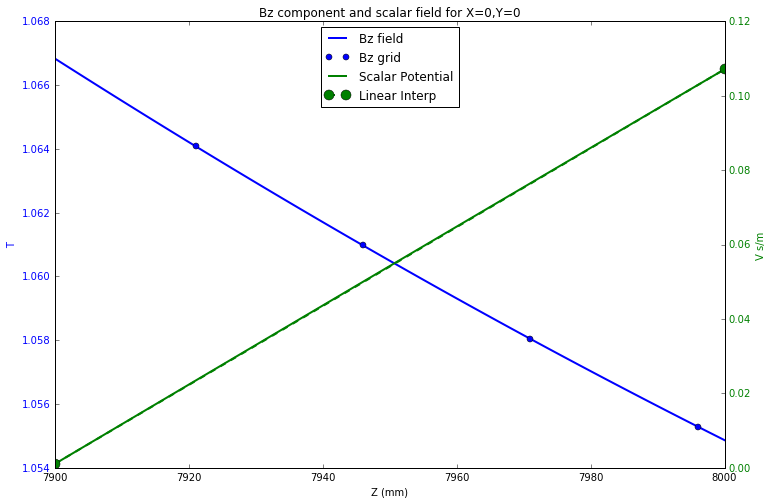

In [8]:
z_grid = zs_1[np.where((zs_1-21)%25==0)]
z_grid_i = np.in1d(zs_1,z_grid)
bz_grid = bzs_1[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_1,bzs_1,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_1)/1000
p2 = ax2.plot(zs_1,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_1[0],zs_1[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)


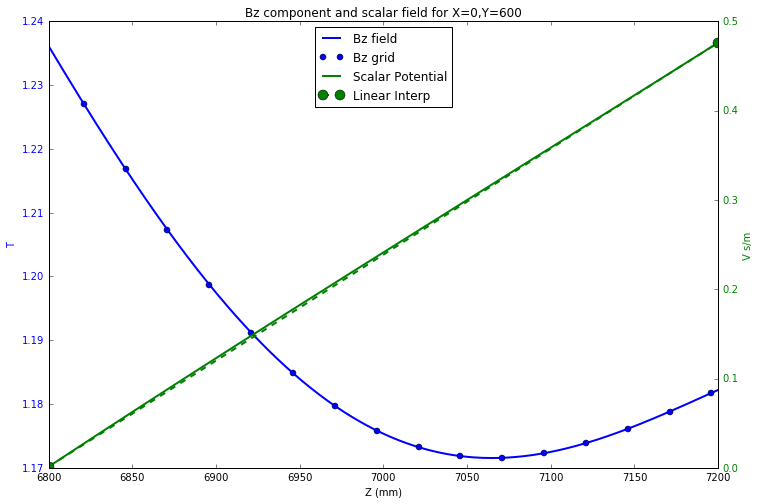

In [9]:
z_grid = zs_2[np.where((zs_2-21)%25==0)]
z_grid_i = np.in1d(zs_2,z_grid)
bz_grid = bzs_2[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_2,bzs_2,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_2)/1000
p2 = ax2.plot(zs_2,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_2[0],zs_2[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=600')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

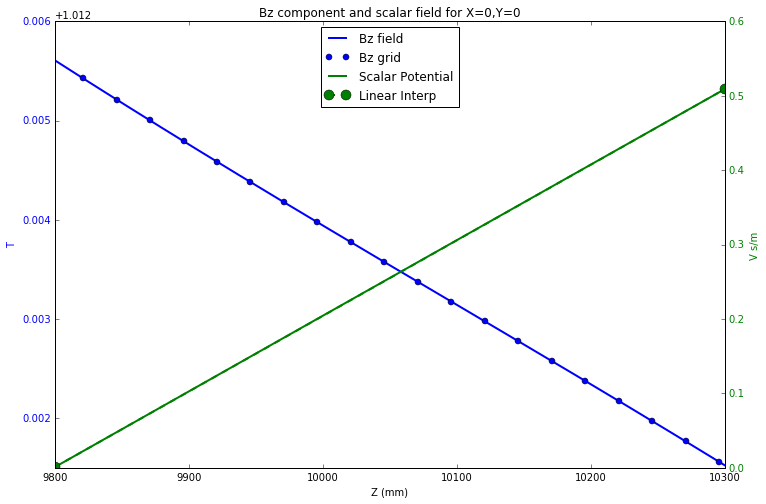

In [13]:
z_grid = zs_3[np.where((zs_3-21)%25==0)]
z_grid_i = np.in1d(zs_3,z_grid)
bz_grid = bzs_3[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_3,bzs_3,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_3)/1000
p2 = ax2.plot(zs_3,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_3[0],zs_3[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

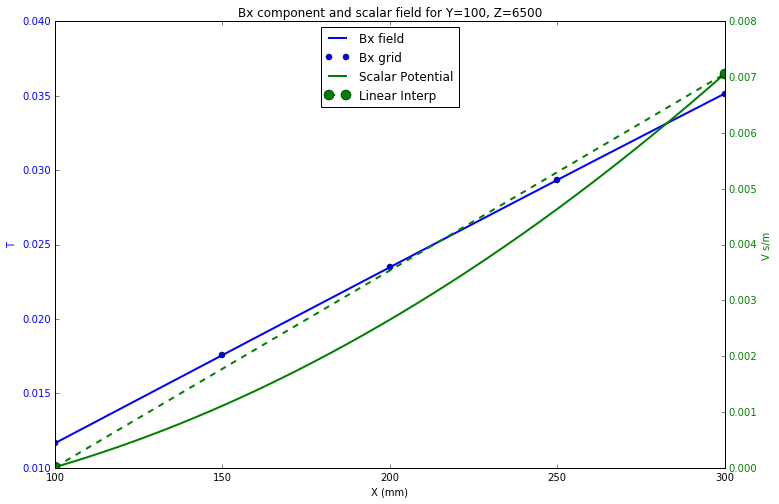

In [14]:
x_grid = xs[np.where((xs)%25==0)]
x_grid_i = np.in1d(xs,x_grid)
bx_grid = bxs[x_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(xs,bxs,'b-',linewidth=2,label='Bx field')
p1_a = ax1.plot(x_grid,bx_grid,'bo',label='Bx grid')
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar=np.cumsum(bxs)/1000
p2 = ax2.plot(xs,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([xs[0],xs[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bx component and scalar field for Y=100, Z=6500')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)